# 基于决策树&随机森林的鲍鱼年龄预测

## 1、 加载鲍鱼数据集

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

# 方法1、在线加载鲍鱼数据集文件（csv格式，建议复制链接下载到本地，然后使用方法2加载）
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
# data = pd.read_csv(url) # 读取在线数据

# 方法2、加载本地数据文件（abalone.data文件所在目录）
abalone = pd.read_csv('./abalone.data')

# 原数据中没有表头（即特征名称），我们加上便于观察数据
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                'Whole weight', 'Shucked weight', 'Viscera weight',
                'Shell weight', 'Rings']

display(abalone) # 4176条数据，8个特征（最后一列Rings代表环数，即年龄，相当于数据的标签）


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 性别特征的值是M、F和I（未知），为了便于算法计算，需要变成数字
new_abalone = abalone.replace({'M':0 ,'F':1, 'I':2}) # M、F、I分别替换为0,1,2
display(new_abalone)

C:\Users\13428\AppData\Local\Temp\ipykernel_5224\2391013016.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_abalone = abalone.replace({'M':0 ,'F':1, 'I':2}) # M、F、I分别替换为0,1,2


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 2、拆分数据集

In [4]:
from sklearn.model_selection import train_test_split

# 从数据集中分离样本数据和标签数据
data = new_abalone.values[:, :8] # 前8列（特征数据）
target = new_abalone.values[:, -1] # 最后一列（年龄）

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.25, random_state=0)

print(X_train.shape, X_test.shape) # 查看拆分结果

(3132, 8) (1044, 8)


## 3、构建回归模型-决策树

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# 创建回归模型
model = DecisionTreeRegressor().fit(X_train, y_train) # 决策树（默认参数）
#model = RandomForestRegressor(50).fit(X_train, y_train) # 使用50棵决策树构成随机森林
#model = LinearRegression().fit(X_train, y_train) # 线性回归

# 评估模型（分类模型输出准确率，回归模型输出R2_score）
print('test_score:', model.score(X_test, y_test))

# 预测测试集中的鲍鱼年龄
y_pred = model.predict(X_test)
n = 10 # 显示前n个样本的预测年龄，并与实际年龄作对比
print('预测年龄：', np.round(y_pred[:n])) # np.round()-四舍五入取整
print('实际年龄：', y_test[:n])

test_score: 0.05988990020835627
预测年龄： [10. 11.  7. 13.  8.  9.  8.  9.  8. 14.]
实际年龄： [ 9. 11.  7. 13.  9. 10.  7. 12. 19.  8.]


## 4、可视化预测曲线

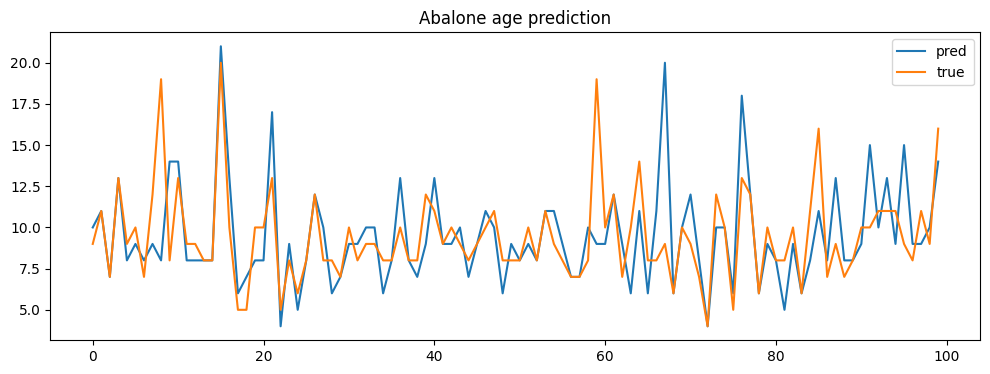

In [6]:
import matplotlib.pyplot as plt

# 可视化预测曲线
plt.figure(figsize=(12, 4)) # 图像尺寸
plt.title('Abalone age prediction') # 标题
n = 100 # 图中显示样本的数量
plt.plot(np.arange(n), y_pred[:n], label='pred') # 预测值
plt.plot(np.arange(n), y_test[:n], label='true') # 实际值
plt.legend() # 显示图例
plt.show()

## 5、决策树及集成算法实现肿瘤分类预测
+ 决策树及集成算法(随机森林、AdaBoost)既可以解决回归问题，也可以解决分类问题。
+ 本任务中，我们对比上述模型在肿瘤分类预测案例中的表现。

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer() # 加载cancer数据集

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.25, random_state=0)
# 创建多种分类模型
m_1 = DecisionTreeClassifier().fit(X_train, y_train) # 无参数决策树（过拟合现象严重）
m_2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=9).fit(X_train, y_train) # 指定剪枝参数
m_3 = RandomForestClassifier(50).fit(X_train, y_train) # 随机森林（使用50棵决策树）
m_4 = AdaBoostClassifier().fit(X_train, y_train) # AdaBoost

# 评估模型，对比准确率
models = {'d_tree_1':m_1, 'd_tree_2':m_2, 'r_forest':m_3, 'adaboost':m_4}
for m in models:
    score_train = models[m].score(X_train, y_train)
    score_test = models[m].score(X_test, y_test)
    print('{}: train_score {:.2f}  test_score {:.2f}'.format(m, score_train, score_test))


C:\Users\13428\.conda\envs\dtsml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


d_tree_1: train_score 1.00  test_score 0.89
d_tree_2: train_score 0.96  test_score 0.94
r_forest: train_score 1.00  test_score 0.97
adaboost: train_score 1.00  test_score 0.98
